# Implemrnting Logistic Regression from Scratch

Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

## Function Implementation

In [12]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def add_const(X: pd.DataFrame):
    X['const'] = 1
    return X

def predict(parameters, X):
    y_pred = sigmoid(np.dot(X, parameters))
    return y_pred

def log_likelihood(model, parameters):
    y_pred = sigmoid(np.dot(model.X, parameters))
    log_l = model.Y * np.log(y_pred) + (1 - model.Y) * np.log(1 - y_pred)
    return np.sum(log_l)

def gradient_descent(model, n_iter, learning_rate):
    parameters = np.array(model.params)
    log_likelihood_record = np.ones(n_iter)
    for i in range(n_iter):
        Y_pred = sigmoid(np.dot(model.X, parameters))
        gradient = np.dot(model.X.T, (model.Y - Y_pred)) / model.X.shape[0]
        parameters += learning_rate * gradient
        log_likelihood_record[i] = log_likelihood(model, parameters)
    return parameters, log_likelihood_record

class Logistic_Reg():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.params = np.zeros((X.shape[1]), dtype=float)

    def fit(self):
        n_iter = 1000000
        learning_rate = 0.00005
        self.params, log_likelihood_record = gradient_descent(self, n_iter, learning_rate)
        return self, log_likelihood_record

    def pred(self):
        Y_pred = predict(self.params, self.X)
        return Y_pred

In [13]:
#log_l = model.Y * y_pred - np.log(1 + np.exp(y_pred))
# n_iter = 10k, lr = 0.0000001

Load Data

In [14]:
# dat_dir = './'

github_url = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_url + 'main/assignments/'

df_lr = pd.read_csv(dat_dir + "stroke_data.csv", index_col=0)

In [15]:
df_lr.head()

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,stroke
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,0
70031,1,71.0,1,0,1,1,195.25,33.3,0,0
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,0
38078,1,82.0,1,1,1,0,73.19,33.5,0,0


In [16]:
X = df_lr[df_lr.columns[:-1]]
Y = df_lr[df_lr.columns[-1]]

In [17]:
print(np.dot(X.T, Y))
print(np.dot(X.iloc[:, 1].T, Y))

[  105.   12250.      57.      36.     160.      86.   24618.62  5517.3
    39.  ]
12250.0


In [18]:
X = add_const(X)
model_t = Logistic_Reg(X, Y)
X.head()

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,const
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,1
70031,1,71.0,1,0,1,1,195.25,33.3,0,1
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,1
38078,1,82.0,1,1,1,0,73.19,33.5,0,1


In [19]:
model_t, log_likelihood_record = model_t.fit()
print(model_t.params)
print(log_likelihood_record)



[-0.30469226  0.04048934  0.49526672  0.24391625 -0.33826662 -0.22258709
  0.00329888 -0.09035016 -0.00586023 -0.93191448]
[-625.44184234 -593.3506951  -573.71828144 ... -399.12980764 -399.1297931
 -399.12977856]


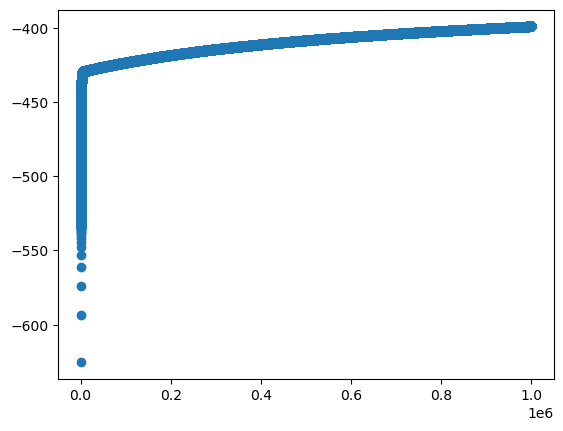

In [20]:
plt.scatter(np.arange(1000000), log_likelihood_record)

In [21]:
print(model_t.pred())

[1.18516486e-01 3.11738252e-01 7.16247376e-01 6.32451473e-01
 4.25349610e-01 9.80144838e-02 6.25488109e-02 3.90051275e-02
 4.90946302e-01 3.50213698e-01 3.80656073e-02 1.05518212e-01
 2.91329824e-01 4.86279774e-01 3.29737117e-01 9.80256898e-02
 3.32126758e-01 1.85524794e-01 7.72186828e-02 1.54224582e-01
 2.37459684e-02 6.06665887e-01 1.89066356e-01 1.06554822e-01
 7.46352497e-02 1.91264825e-01 2.17279205e-01 1.49915839e-01
 1.01111705e-01 3.99785606e-02 1.66763679e-01 3.04708266e-02
 1.29868781e-01 3.74093848e-01 3.06501106e-01 6.71151021e-02
 1.09778336e-01 4.52284362e-01 7.56649539e-01 2.15984500e-01
 2.44106340e-01 1.86314713e-01 2.29565869e-01 4.36180528e-02
 5.10457886e-01 3.05264752e-01 1.95791417e-01 9.45000496e-02
 2.46638943e-01 5.44448734e-01 6.39741057e-02 1.83445651e-01
 2.73313485e-02 3.49010581e-01 1.18112148e-01 3.41467895e-01
 2.16791828e-01 9.25034108e-02 2.51367426e-02 1.40101747e-02
 4.73427092e-02 4.05367399e-02 3.36570868e-01 3.05988522e-01
 3.63642360e-01 6.083493

## sklearn

In [22]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X, Y)
print(model_sk.coef_)
print(model_t.params)

[[ 6.61724176e-02  7.14594239e-02  3.83358587e-01  2.30303172e-01
  -2.70537499e-01 -2.24349174e-02  4.40739044e-03  1.32447120e-03
   4.18715650e-01 -2.84735793e+00]]
[-0.30469226  0.04048934  0.49526672  0.24391625 -0.33826662 -0.22258709
  0.00329888 -0.09035016 -0.00586023 -0.93191448]


/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
Y_pred_sk = pd.DataFrame(data=model_sk.predict_proba(X)[:, 1])
log_likelihood_sk = np.dot(Y, np.log(Y_pred_sk)) + np.dot((1 - Y), np.log(1 - Y_pred_sk))
print(log_likelihood_sk)
print(model_sk.score(X, Y))

[-357.85170201]
0.8214285714285714


## statsmodels

In [27]:
import statsmodels.api as sm

model_stat = sm.Logit(Y, X).fit()
model_stat.summary()


Optimization terminated successfully.
         Current function value: 0.364640
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                  980
Model:                          Logit   Df Residuals:                      970
Method:                           MLE   Df Model:                            9
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.2354
Time:                        16:10:23   Log-Likelihood:                -357.35
converged:                       True   LL-Null:                       -467.38
Covariance Type:            nonrobust   LLR p-value:                 2.028e-42
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
is_female             0.1219      0.196      0.623      0.533      -0.262       0.505
age                   0.0760      0.008      9.963      0.000       0.061       0.091
hypertension          0.4018      0.221      1.820      0.069      -0.031       0.835
heart_disease         0.3143      0.268      1.172      0.241      -0.211       0.840
ever_married         -0.2905      0.312     -0.931      0.352      -0.902       0.321
Rural_residence       0.0235      0.189      0.124      0.901      -0.347       0.394
avg_glucose_level     0.0044      0.002      2.623      0.009       0.001       0.008
bmi                   0.0094      0.014      0.659      0.510      -0.019       0.037
smoking               0.5304      0.238      2.231      0.026       0.064       0.996
const                -6.8913      0.756     -9.112      0.000      -8.374      -5.409
=====================================================================================
"""

In [28]:
print(model_sk.coef_)
print(model_t.params)

[[ 6.61724176e-02  7.14594239e-02  3.83358587e-01  2.30303172e-01
  -2.70537499e-01 -2.24349174e-02  4.40739044e-03  1.32447120e-03
   4.18715650e-01 -2.84735793e+00]]
[-0.30469226  0.04048934  0.49526672  0.24391625 -0.33826662 -0.22258709
  0.00329888 -0.09035016 -0.00586023 -0.93191448]
